# Análise de Dados de Filmes Exibidos no Brasil de 2009 - 2018

Com base nos dados da Ancine (http://oca.ancine.gov.br) vamos analisar os filmes exibidos no Brasil

Arquivo -> Listagem_de_Filmes_Brasileiros_e_Estrangeiros_Exibidos.xlsx

In [1]:
# importando as libs
import pandas as pd

# configurando matplotlib
%matplotlib inline

In [2]:
# Criar o DataFrame com base no arquivo Excel
# removendo as 2 primeiras linhas (skiprows)
# removendo as ultimas linhas (skipfooter)

df = pd.read_excel("Listagem_de_Filmes_Brasileiros_e_Estrangeiros_Exibidos.xlsx", 
                  skiprows=2, skipfooter=16)

# exibe as primeiras linhas do DataFrame
df.head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
0,2009,2012,E1600546500000,Ficção,Estados Unidos,Estrangeira,2009-11-13 00:00:00,Sony,Distribuição Internacional,5056558,42950999.00
1,2009,007 Quantum of Solace,E1402431200000,Ficção,"Estados Unidos, Inglaterra",Estrangeira,2008-11-07 00:00:00,Sony,Distribuição Internacional,8672,44151.00
2,2009,1983.. O Ano Azul,B0901024500000,Documentário,Brasil,Brasileira,2009-06-05 00:00:00,Prana Filmes,Distribuição Nacional,2313,23001.98
3,2009,2 Filhos de Francisco: A História de Zezé Di C...,B0500302600000,Ficção,Brasil,Brasileira,2005-08-19 00:00:00,Sony,Distribuição Internacional,75,225.00
4,2009,23 Anos em 7 Segundos: 1977 - O Fim do Jejum C...,B0901028800000,Documentário,Brasil,Brasileira,2009-06-26 00:00:00,Fox,Distribuição Internacional,1718,14936.00


In [3]:
# verificando o final
df.tail()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
6393,2018,Imagens Do Estado Novo 1937-45,B1600193300000,Documentário,Brasil,Brasileira,2018-03-15 00:00:00,Brasil 1500,Distribuição Nacional,2701,39625.0
6394,2018,O Jabuti E A Anta,B1700090400000,Documentário,Brasil,Brasileira,2018-03-23 00:00:00,Taturana,Distribuição Nacional,202,1905.0
6395,2018,O Muro,B1800247400000,Documentário,Brasil,Brasileira,2018-06-07 00:00:00,Espiral,Distribuição Nacional,205,2661.0
6396,2018,Parquelândia,B1800487600000,Documentário,Brasil,Brasileira,2018-11-08 00:00:00,Taturana,Distribuição Nacional,18,190.0
6397,2018,Quem Mora Lá,B1800396500000,Documentário,Brasil,Brasileira,2018-11-20 00:00:00,Califórnia/Taturana,Distribuição Nacional,65,779.0


In [4]:
# verificar todos os tipo das colunas
df.dtypes

Ano de exibição                      int64
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [5]:
# convertendo o campo data de lançamento de object para data
# isso da erro por motivo que o campo possui um valor "Relançamento" no lugar da data
#df["Data de lançamento"] = pd.to_datetime(df["Data de lançamento"])

In [6]:
# tentar identificar o problema da coluna Data de lançamento
df["Data de lançamento"].value_counts()

Relançamento           175
2012-12-21 00:00:00     33
2015-12-03 00:00:00     33
2013-11-29 00:00:00     29
2012-11-02 00:00:00     27
                      ... 
2014-11-08 00:00:00      1
2018-12-01 00:00:00      1
2009-03-14 00:00:00      1
2009-01-31 00:00:00      1
2005-07-01 00:00:00      1
Name: Data de lançamento, Length: 821, dtype: int64

In [7]:
# visualizar quantidade de do DataFrame
df.shape

(6398, 11)

In [8]:
# exibir alguns filmes que estão com datas igual a Relançamento
df[df["Data de lançamento"] == "Relançamento"].head()

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
10,2009,A agenda,E1600634500000,Ficção,França,Estrangeira,Relançamento,Imovision,Distribuição Nacional,33,154.5
248,2009,Fome de Viver,E1600228600000,Ficção,Reino Unido,Estrangeira,Relançamento,Filmes do Estação,Distribuição Nacional,268,944.0
426,2009,Os Contos de Canterbury,E1600589800000,Ficção,Itália,Estrangeira,Relançamento,Pandora,Distribuição Nacional,5026,29614.0
474,2009,Ratatouille,E1500365600000,Animação,Estados Unidos,Estrangeira,Relançamento,Sony,Distribuição Internacional,230,2300.0
506,2009,Sofá Cama,E1600624100000,Ficção,Argentina,Estrangeira,Relançamento,Panda Filmes,Distribuição Nacional,579,3529.6


## Decisão sobre dados incorretos/faltantes/divergentes

In [13]:
# criar um novo DataFrame sem os Relançamentos
df_sem_relancamento = df[df["Data de lançamento"] != "Relançamento"].copy()

In [14]:
# ver os tipos
df_sem_relancamento.dtypes

Ano de exibição                      int64
Título da obra                      object
CPB/ROE                             object
Gênero                              object
País(es) produtor(es) da obra       object
Nacionalidade da obra               object
Data de lançamento                  object
Distribuidora                       object
Origem da empresa distribuidora     object
Público no ano de exibição           int64
Renda (R$) no ano de exibição      float64
dtype: object

In [15]:
df_sem_relancamento.shape

(6223, 11)

In [16]:
# converter a coluna "Data de lançamento" para datetime
df_sem_relancamento["Data de lançamento"] = pd.to_datetime(
                                                df_sem_relancamento["Data de lançamento"])

In [17]:
# verificando os tipos
df_sem_relancamento.dtypes

Ano de exibição                             int64
Título da obra                             object
CPB/ROE                                    object
Gênero                                     object
País(es) produtor(es) da obra              object
Nacionalidade da obra                      object
Data de lançamento                 datetime64[ns]
Distribuidora                              object
Origem da empresa distribuidora            object
Público no ano de exibição                  int64
Renda (R$) no ano de exibição             float64
dtype: object

In [20]:
# quais os anos tiveram mais filmes lançados
df_sem_relancamento["Data de lançamento"].dt.year.value_counts()

2013    673
2017    664
2015    660
2016    634
2014    625
2011    553
2012    541
2009    504
2018    492
2010    476
2008    225
2007     61
2006     49
2005     29
2004     10
2002      6
2001      5
2003      4
1999      3
2019      3
2000      2
2020      1
1978      1
1987      1
1998      1
Name: Data de lançamento, dtype: int64

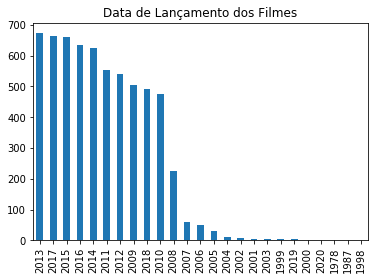

In [30]:
# plotar grafico de barras com os lançamentos por ano
df_sem_relancamento["Data de lançamento"].dt.year.value_counts().plot.bar(
    title="Data de Lançamento dos Filmes")

In [32]:
# qual filme de maior bileteria
df_sem_relancamento[
    df_sem_relancamento["Renda (R$) no ano de exibição"] == 
        df_sem_relancamento["Renda (R$) no ano de exibição"].max()
]

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5848,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280,238020232.0


In [35]:
# verifica os 5 maiores filmes com maior bileteria
df_sem_relancamento.nlargest(5, "Renda (R$) no ano de exibição")

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
5848,2018,Vingadores: Guerra Infinita,E1800067100000,Ficção,Estados Unidos,Estrangeira,2018-04-26,Disney,Distribuição Internacional,14501280,2.380202e+08
4206,2015,Vingadores: A Era de Ultron,E1500563200000,Ficção,Estados Unidos,Estrangeira,2015-04-23,Disney,Distribuição Internacional,10129071,1.461849e+08
5840,2018,Os Incríveis 2,E1800037700000,Animação,Estados Unidos,Estrangeira,2018-06-28,Disney,Distribuição Internacional,9809291,1.450118e+08
4411,2016,Capitão América: Guerra civil,E1600129800000,Ficção,Estados Unidos,Estrangeira,2016-04-28,Disney,Distribuição Internacional,9617572,1.433370e+08
4199,2015,Velozes e Furiosos 7,E1500161300000,Ficção,Estados Unidos,Estrangeira,2015-04-02,Universal,Distribuição Internacional,9857946,1.424659e+08


In [36]:
# verifica os 5 menores filmes com menor bileteria
df_sem_relancamento.nsmallest(5, "Renda (R$) no ano de exibição")

,Ano de exibição,Título da obra,CPB/ROE,Gênero,País(es) produtor(es) da obra,Nacionalidade da obra,Data de lançamento,Distribuidora,Origem da empresa distribuidora,Público no ano de exibição,Renda (R$) no ano de exibição
100,2009,As Chaves de Casa,E1600598400000,Ficção,Itália,Estrangeira,2006-01-06,Filmes do Estação,Distribuição Nacional,0,0.0
360,2009,Naufrágio - Mistério e Morte na Catástrofe do ...,B1101495000000,Documentário,Brasil,Brasileira,2009-12-25,Master Shot Produções,Distribuição Nacional,0,0.0
488,2009,Santiago,B0700739200000,Documentário,Brasil,Brasileira,2007-08-24,Videofilmes,Distribuição Nacional,0,0.0
563,2009,"Vamos Subir, Leão",Sem CPB,Documentário,Brasil,Brasileira,2009-03-20,Canal 3,Distribuição Nacional,0,0.0
727,2010,Cine Cocoricó: As Aventuras na Cidade,B0901055900000,Ficção,Brasil,Brasileira,2009-07-17,Moviemobz,Distribuição Nacional,1,0.0


In [37]:
# quantos filmes brasileiros e extrangeiros?
df_sem_relancamento["Nacionalidade da obra"].value_counts()

Estrangeira    4356
Brasileira     1867
Name: Nacionalidade da obra, dtype: int64